In [3]:

from google.colab import files


uploaded = files.upload()

Saving Reviews.csv to Reviews.csv


In [4]:
import pandas as pd
import io
data = pd.read_csv(io.BytesIO(uploaded['Reviews.csv']))
print(data)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [5]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [6]:
# checking the null values
data.isnull().sum()


Review    0
Liked     0
dtype: int64

In [7]:
#checking the duplicate data
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [8]:
#exploratary data analysis matplotlib and seborn
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
from wordcloud import WordCloud

In [10]:
combined_text = " ".join(data['Review']) #combine all review text into one string
combined_text

'Wow... Loved this place. Crust is not good. Not tasty and the texture was just nasty. Stopped by during the late May bank holiday off Rick Steve recommendation and loved it. The selection on the menu was great and so were the prices. Now I am getting angry and I want my damn pho. Honeslty it didn\'t taste THAT fresh.) The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer. The fries were great too. A great touch. Service was very prompt. Would not go back. The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced. I tried the Cape Cod ravoli, chicken, with cranberry...mmmm! I was disgusted because I was pretty sure that was human hair. I was shocked because no signs indicate cash only. Highly recommended. Waitress was a little slow in service. This place is not worth your time, let alone Vegas. did not like at all. The Burrittos Blah! The food, amazing. Service is also cute. I could care l

In [11]:
wordcloud = WordCloud(width=800, height = 400, background_color = 'white').generate(combined_text)

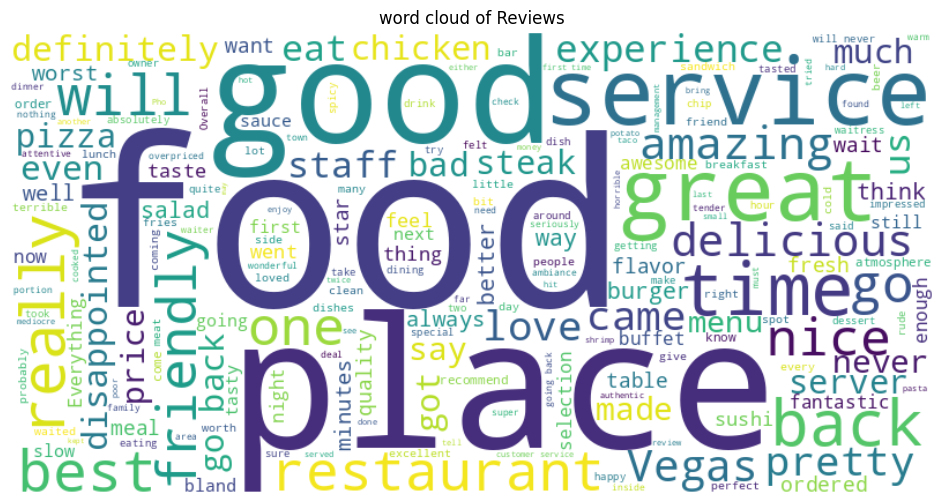

In [12]:
plt.figure(figsize=(15,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('word cloud of Reviews')
plt.show()

In [13]:
from collections import Counter

In [14]:
targeted_words = ['good','great','amazing','bad','nor bad']
all_words=" ".join(data['Review']).lower().split() #flatten reviews into a single list of words
word_counts = Counter(all_words)
target_word_count={word: word_counts[word] for word in targeted_words}

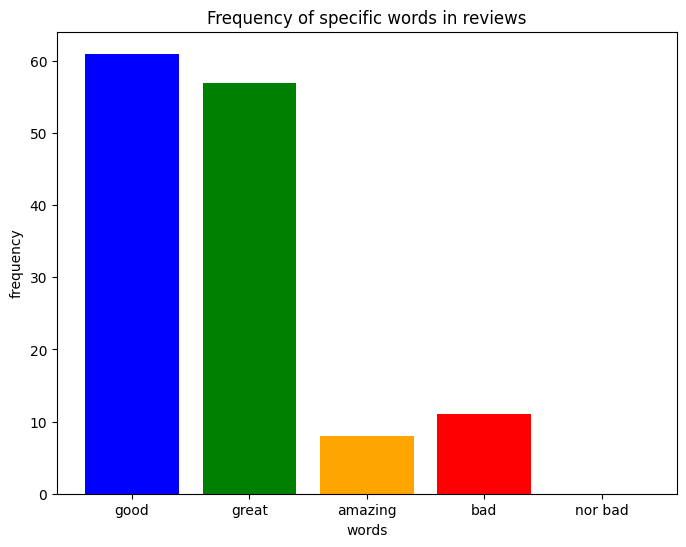

In [15]:
plt.figure(figsize=(8,6))
plt.bar(target_word_count.keys(), target_word_count.values(), color=['blue','green','orange','red','black'])
plt.xlabel('words')
plt.ylabel('frequency')
plt.title('Frequency of specific words in reviews')
plt.show()

In [16]:
#Text PreProcessing

In [17]:
#converting a datset into a lowercase

lowercased_text=data['Review'].str.lower()
print(lowercased_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [18]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
#tokenization (its a NLP model)
#(converts the sequence of text words into smaller parts known as tokens)
from nltk.tokenize import word_tokenize

In [20]:
data['Tokens']=data['Review'].apply(word_tokenize)
print(data['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [22]:
#REmoving stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [23]:
stop_words=set(stopwords.words('english'))

In [24]:
data['Tokens']=data['Tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [25]:
print(data['Tokens'])

0                            [Wow, ..., Loved, place, .]
1                                       [Crust, good, .]
2                        [Not, tasty, texture, nasty, .]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4               [The, selection, menu, great, prices, .]
                             ...                        
995        [I, think, food, flavor, texture, lacking, .]
996                       [Appetite, instantly, gone, .]
997          [Overall, I, impressed, would, go, back, .]
998    [The, whole, experience, underwhelming, ,, I, ...
999    [Then, ,, I, n't, wasted, enough, life, ,, pou...
Name: Tokens, Length: 1000, dtype: object


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [27]:
#Stemming (Stemming is a text preprocessing technique in natural language processing (NLP)
#it is a processing of reducing the inflected word to root form )

from nltk.stem import PorterStemmer
#from nltk.tokenize import word_tokenize

In [28]:
stemmer = PorterStemmer()

In [29]:
data['stemmed']=data['Review'].apply(lambda x: [stemmer.stem(word) for word in word_tokenize(x)])

In [30]:
print(data['stemmed'])

0                        [wow, ..., love, thi, place, .]
1                              [crust, is, not, good, .]
2      [not, tasti, and, the, textur, wa, just, nasti...
3      [stop, by, dure, the, late, may, bank, holiday...
4      [the, select, on, the, menu, wa, great, and, s...
                             ...                        
995    [i, think, food, should, have, flavor, and, te...
996                        [appetit, instantli, gone, .]
997    [overal, i, wa, not, impress, and, would, not,...
998    [the, whole, experi, wa, underwhelm, ,, and, i...
999    [then, ,, as, if, i, had, n't, wast, enough, o...
Name: stemmed, Length: 1000, dtype: object


In [31]:
#Lemmatization

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [32]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [33]:
lemmatizer = WordNetLemmatizer()

In [34]:
data['Lemmatized'] = data['Review'].apply(lambda x:' '.join([lemmatizer.lemmatize(word,pos=wordnet.VERB) for word in word_tokenize(x)]))

In [35]:
print(data['Lemmatized'])

0                             Wow ... Loved this place .
1                                    Crust be not good .
2              Not tasty and the texture be just nasty .
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                              Appetite instantly go .
997     Overall I be not impress and would not go back .
998    The whole experience be underwhelming , and I ...
999    Then , as if I have n't waste enough of my lif...
Name: Lemmatized, Length: 1000, dtype: object


In [36]:
#rRemove the numbers

import re
data['No_Numbers']=data['Review'].apply(lambda x: re.sub(r'\d+','',x))

In [37]:
print(data['No_Numbers'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [38]:
data['cleaned_text']=data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]',' ',x))

In [39]:
print(data['cleaned_text'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned_text, Length: 1000, dtype: object


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review        1000 non-null   object
 1   Liked         1000 non-null   int64 
 2   Tokens        1000 non-null   object
 3   stemmed       1000 non-null   object
 4   Lemmatized    1000 non-null   object
 5   No_Numbers    1000 non-null   object
 6   cleaned_text  1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [41]:
#Normaliztion
!pip install contractions
import contractions
data['Expandes']=data['Review'].apply(lambda x: contractions.fix)
print(data['Expandes'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.7 MB/s eta 0:00:00
0      <function fix at 0x7e9536ae0b80>
1      <function fix at 0x7e9536ae0b80>
2      <function fix at 0x7e9536ae0b80>
3      <function fix at 0x7e9536ae0b80>
4      <function fix at 0x7e9536ae0b80>
                     ...               
995    <function fix at 0x7e9536ae0b80>
996    <function fix at 0x7e9536ae0b80>
997    <function fix at 0x7e9536ae0b80>
998    <function fix at 0x7e9536ae0b80>
999    <function fix at 0x7e9536ae0b80>
Name: Expandes, Length: 1000, dtype: object


In [42]:
#Removing the emojis
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 2.9 MB/s eta 0:00:00


In [43]:
import emoji
data['Emoji']=data['Review'].apply(emoji.demojize)
print(data['Emoji'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Emoji, Length: 1000, dtype: object


In [44]:
!pip install beautifulsoup4

In [45]:
#for removing the html tags we need to install the beautifulsoup4 library
from bs4 import BeautifulSoup
data['cleaned']=data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())

<ipython-input-45-270b61790d21>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['cleaned']=data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())


In [46]:
print(data['cleaned'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [47]:
#TF - IDF VECTORIZER
#TF - Term Frequency , IDF=Inverse Document Frequency
#!pip install sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data["Review"])

In [48]:
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [49]:
# Buliding machine Learning Model

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [50]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data["Review"])
y = data["Liked"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print(X_train,X_test,y_train,y_test)

  (0, 1527)	0.578582388550776
  (0, 1516)	0.5587881819736206
  (0, 2005)	0.45560954528848707
  (0, 1938)	0.20794801889277578
  (0, 1778)	0.3196494189359375
  (1, 711)	0.4193390530637025
  (1, 622)	0.4193390530637025
  (1, 1180)	0.3554925882290983
  (1, 613)	0.32026666852400937
  (1, 1471)	0.272554926639921
  (1, 62)	0.5164170315313602
  (1, 263)	0.27998403419950374
  (2, 1057)	0.5102287539842273
  (2, 1962)	0.48790050997574835
  (2, 699)	0.3031291394604372
  (2, 1618)	0.5102287539842273
  (2, 1571)	0.3198299691276987
  (2, 1938)	0.21704341786509082
  (3, 1723)	0.4538927163856403
  (3, 1852)	0.42838721919777234
  (3, 719)	0.30305480231081033
  (3, 1791)	0.3192733609259723
  (3, 821)	0.37508854376741335
  (3, 590)	0.33614831815132157
  (3, 1471)	0.29501353406759745
  :	:
  (797, 1796)	0.2155139089210878
  (798, 649)	0.34296597014320795
  (798, 787)	0.34296597014320795
  (798, 17)	0.34296597014320795
  (798, 406)	0.32369375609078
  (798, 18)	0.34296597014320795
  (798, 122)	0.342965970143

In [58]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [59]:
y_pred = model.predict(X_test)

In [60]:
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

In [61]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



In [83]:
#predict sentiment for new review

def predict_sentiment(new_review):
    # Define the preprocess_text function here if it's not imported
    def preprocess_text(text):
        # Implement your text preprocessing steps here
        # Example:
        text = text.lower()
        return text

    cleaned_review = preprocess_text(new_review)
    X_new = vectorizer.transform([cleaned_review])
    return model.predict(X_new)[0]

In [92]:
new_reviews = input("Enter a review :")

Enter a review :the food was very bad


In [94]:
for review in new_reviews:
    sentiment = predict_sentiment(review)
    sentiment_label = 'Positive' if sentiment == 1  else 'Negative'
    print(f"Review: '{review}'\nPredicted sentiment: {sentiment_label}\n")

Review: 't'
Predicted sentiment: Negative

Review: 'h'
Predicted sentiment: Negative

Review: 'e'
Predicted sentiment: Negative

Review: ' '
Predicted sentiment: Negative

Review: 'f'
Predicted sentiment: Negative

Review: 'o'
Predicted sentiment: Negative

Review: 'o'
Predicted sentiment: Negative

Review: 'd'
Predicted sentiment: Negative

Review: ' '
Predicted sentiment: Negative

Review: 'w'
Predicted sentiment: Negative

Review: 'a'
Predicted sentiment: Negative

Review: 's'
Predicted sentiment: Negative

Review: ' '
Predicted sentiment: Negative

Review: 'v'
Predicted sentiment: Negative

Review: 'e'
Predicted sentiment: Negative

Review: 'r'
Predicted sentiment: Negative

Review: 'y'
Predicted sentiment: Negative

Review: ' '
Predicted sentiment: Negative

Review: 'b'
Predicted sentiment: Negative

Review: 'a'
Predicted sentiment: Negative

Review: 'd'
Predicted sentiment: Negative

